# Bank Scoring Case
### Predicting probability of default

***(Based on mlcourse.ai training materials)***

**The problem of credit scoring is being solved**


In [70]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold


%matplotlib inline

In [49]:
import warnings
warnings.filterwarnings('ignore')

**Load data**

In [72]:
train_df = pd.read_csv('...\\X_train.csv')
test_df = pd.read_csv('...\\X_test.csv', index_col='index')
y = pd.read_csv('...\\y_train.csv')

In [19]:
test_sample = pd.read_csv('C:\\Users\\Pav\\Desktop\\Py\\VTB_project\\data bank scoring case\\y_test_sample.csv')

In [22]:
trial_1 = pd.read_csv('C:\\Users\\Pav\\Desktop\\Py\\VTB_project\\trial_1.csv')

In [26]:
trial_1.shape

(38876, 2)

In [27]:
test_sample.shape

(38876, 2)

In [38]:
trial_1.head()

,index,target
0,143522,0.016271
1,116747,0.016271
2,66075,0.070961
3,133292,0.016271
4,83134,0.016271


In [30]:
test_sample.head()

,index,target
0,143522,0.226834
1,116747,0.252293
2,66075,0.592295
3,133292,0.697950
4,83134,0.672565


**Look at the number of gaps in each feature**

In [3]:
train_df.isnull().sum()

credit_card_utilization           0
age                               0
overdue_30_59_days                0
debt_to_income                    0
monthly_income                20993
credits_loans                     0
overdue__more_than_90_days        0
mortgage_loans                    0
overdue_60_89_days                0
family_members                 2805
dtype: int64

In [4]:
test_df.isnull().sum()

credit_card_utilization          0
age                              0
overdue_30_59_days               0
debt_to_income                   0
monthly_income                7545
credits_loans                    0
overdue__more_than_90_days       0
mortgage_loans                   0
overdue_60_89_days               0
family_members                 955
dtype: int64

In [5]:
test_df.sort_values('index')

,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members
index,,,,,,,,,,
5,0.803987,34,0,0.265733,9685.367388,9,0,2,0,0.0
6,0.120180,69,0,300.635985,NaN,7,0,0,0,0.0
9,0.109288,46,0,0.261471,5473.709025,10,0,2,0,2.0
11,0.000000,35,0,0.009727,5268.653797,10,0,0,0,0.0
12,0.005605,31,0,6.729295,NaN,2,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
143962,0.356819,60,0,0.279970,2258.132166,8,0,0,0,0.0
143963,0.081909,48,1,0.816354,4246.673946,17,0,1,0,1.0
143964,0.052961,70,0,0.010081,10891.460512,12,0,0,0,0.0


**Replace gaps with median values**

In [6]:
train_df['monthly_income'].fillna(train_df['monthly_income'].median(), inplace=True)
train_df['family_members'].fillna(train_df['family_members'].median(), inplace=True)
test_df['monthly_income'].fillna(test_df['monthly_income'].median(), inplace=True)
test_df['family_members'].fillna(test_df['family_members'].median(), inplace=True)

### Decision tree without  tuned params

In [7]:
first_tree = clf = DecisionTreeClassifier(random_state=17, max_depth=3)
                                    
first_tree.fit(train_df, y)

DecisionTreeClassifier(max_depth=3, random_state=17)

In [8]:
first_tree_pred = first_tree.predict_proba(test_df)

In [9]:
first_tree_pred = first_tree.predict(test_df)

In [10]:
first_tree_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

**Write the forecast to a file**

In [ ]:
trial_1['index'] = test_sample['index'].values

In [34]:
def write_to_submission_file(predicted_labels, out_file,
                             target='target', index_label="index"):
    # turn predictions into data frame and save as csv file
    predicted_df = pd.DataFrame(predicted_labels,
                                index = test_sample['index'].values,
                                columns=[target])
    predicted_df.to_csv(out_file, index_label=index_label)

In [12]:
first_tree_pred_probs = first_tree.predict_proba(test_df)[:, 1]

In [13]:
first_tree_pred_probs

array([0.01762408, 0.01762408, 0.0824928 , ..., 0.01762408, 0.10357125,
       0.01762408])

In [14]:
write_to_submission_file(first_tree_pred_probs, \
                         r'...\\trial_1.csv')

**Scores of Kaggle submission**
- Private: 0.84409
- Public: 0.84987

## DecisionTreeClassifier with tuned params

In [15]:
tree_params = {'max_depth': list(range(3, 8)), 
               'min_samples_leaf': list(range(5, 13))}

clf = DecisionTreeClassifier(random_state=17)

cv = StratifiedKFold(shuffle=True, n_splits=5)
locally_best_tree = GridSearchCV(estimator=clf, param_grid=tree_params, cv=5, n_jobs=-1)
locally_best_tree.fit(train_df, y) 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=17), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [5, 6, 7, 8, 9, 10, 11, 12]})

In [16]:
locally_best_tree.best_params_, round(locally_best_tree.best_score_, 3)

({'max_depth': 4, 'min_samples_leaf': 5}, 0.937)

In [17]:
tuned_tree_pred_probs = locally_best_tree.predict_proba(test_df)[:, 1]

In [73]:
write_to_submission_file(tuned_tree_pred_probs, \
                         r'...\\trial_GridSearhCV.csv')

**Scores of Kaggle submissions**
- Private: 0.83520
- Public: 0.82896

### RandomForest without tuned params

In [43]:
first_forest = RandomForestClassifier(random_state=17, n_jobs=-1)  
                                    
first_forest.fit(train_df, y)

C:\Users\Pav\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(n_jobs=-1, random_state=17, warm_start=True)

In [59]:
first_forest_pred = first_forest.predict_proba(test_df)[:, 1]

In [75]:
write_to_submission_file(first_forest_pred, \
                         r'C:\\Users\\Pav\\Desktop\\Py\\VTB_project\\trial_1.csv')

**Scores of Kaggle submissions**
- Private: 0.0.83920
- Public: 0.85070

### RandomForest with tuned params

In [50]:
%%time
forest_params = {'max_features': np.linspace(.3, 1, 7)}

cv = StratifiedKFold(shuffle=True, n_splits=5)
locally_best_forest = GridSearchCV(first_forest, param_grid=forest_params, cv=cv)
locally_best_forest.fit(train_df, y)

Wall time: 10min 31s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=17,
                                              warm_start=True),
             param_grid={'max_features': array([0.3       , 0.41666667, 0.53333333, 0.65      , 0.76666667,
       0.88333333, 1.        ])})

In [51]:
locally_best_forest.best_params_, round(locally_best_forest.best_score_, 3)

({'max_features': 0.3}, 0.936)

In [79]:
locally_best_forest.best_estimator_

RandomForestClassifier(max_features=0.3, n_jobs=-1, random_state=17,
                       warm_start=True)

In [80]:
tuned_forest_pred = locally_best_forest.best_estimator_.predict_proba(test_df)[:, 1]

In [81]:
write_to_submission_file(tuned_forest_pred, \
                         r'C:\\Users\\Pav\\Desktop\\Py\\VTB_project\\trial_1.csv')

**Scores of Kaggle submissions**
- Private: 0.0.83920
- Public: 0.85070

It just stayed the same as RF without tuned params

**See how tuned RandomForest scores the importance of features based on their effect on the target variable**

In [64]:
pd.DataFrame(locally_best_forest.best_estimator_.feature_importances_,  index=train_df.columns, columns=['importance']) # Ваш код здесь

,importance
credit_card_utilization,0.209372
age,0.118509
overdue_30_59_days,0.050325
debt_to_income,0.167442
monthly_income,0.148064
credits_loans,0.088174
overdue__more_than_90_days,0.091920
mortgage_loans,0.034577
overdue_60_89_days,0.051386
family_members,0.040230


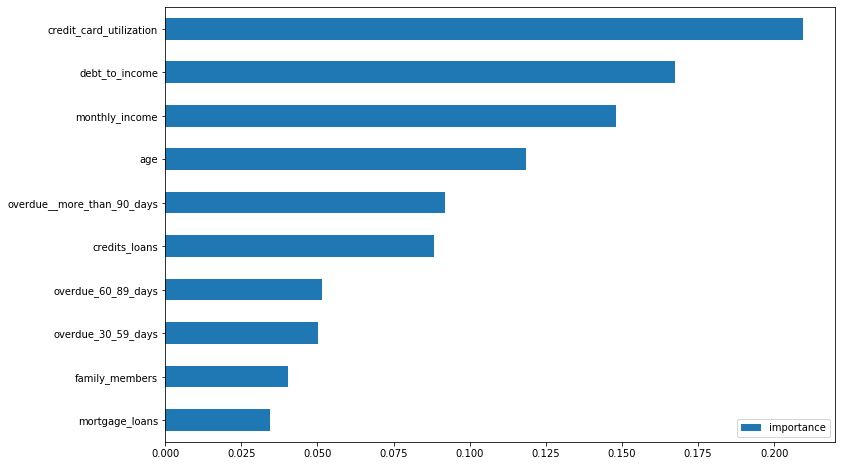

In [63]:
imp = pd.DataFrame(locally_best_forest.best_estimator_.feature_importances_, index=train_df.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

**Try to use the best model of RF got on a GridSearchCV with setting 300 trees (100 by default)**

In [84]:
%%time
final_forest = RandomForestClassifier(max_features=0.3, random_state=17, n_jobs=-1, n_estimators=300, warm_start=True)
final_forest.fit(train_df, y)
final_forest_pred = final_forest.predict_proba(test_df)[:, 1]


Wall time: 36.8 s


In [82]:
write_to_submission_file(final_forest_pred, r'C:\\Users\\Pav\\Desktop\\Py\\VTB_project\\credit_scoring_final_forest.csv')

**Scores of Kaggle submissions**
- Private: 0.84409
- Public: 0.84987
    
The result with 300 trees (100 trees by default) got worse